In [25]:
import pandas as pd
import matplotlib.pyplot as plt # For visualizations
import seaborn as sns
from wordcloud import WordCloud
from bertopic import BERTopic

ModuleNotFoundError: No module named 'wordcloud'

## Import raw dataset

In [9]:
raw_data=pd.read_csv("C:/Users/norap/Documents/GitHub/Machine Learning NLP TU Wien/data/raw/okcupid_profiles.csv")
raw_data.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


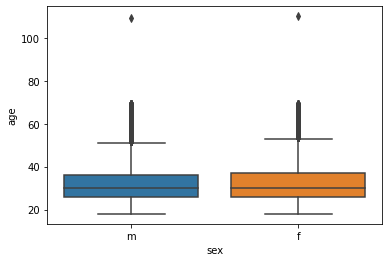

In [12]:
sns.boxplot(x='sex', y='age', data=raw_data)
plt.show()
df_essay1 = raw_data[raw_data.essay1.notnull()]

In [20]:
#Make list of only essay1 strings
df_essay1.columns
essay_1 = df_essay1["essay1"]
essay_1 = list(essay_1)

['currently working as an international agent for a freight forwarding company. import, export, domestic you know the works. online classes and trying to better myself in my free time. perhaps a hours worth of a good book or a video game on a lazy sunday.', 'dedicating everyday to being an unbelievable badass.', "i make nerdy software for musicians, artists, and experimenters to indulge in their own weirdness, but i like to spend time away from the computer when working on my artwork (which is typically more concerned with group dynamics and communication, than with visual form, objects, or technology). i also record and deejay dance, noise, pop, and experimental music (most of which electronic or at least studio based). besides these relatively ego driven activities, i've been enjoying things like meditation and tai chi to try and gently flirt with ego death.", 'reading things written by old dead people', 'work work work work + play', "building awesome stuff. figuring out what's impor

In [24]:
#lowercase all essay 1 strings
essay_1 = (map(lambda x: x.lower(), essay_1))
essay_1 = essay_1.text.to_list()
essay_1[0:10]

['currently working as an international agent for a freight forwarding company. import, export, domestic you know the works. online classes and trying to better myself in my free time. perhaps a hours worth of a good book or a video game on a lazy sunday.',
 'dedicating everyday to being an unbelievable badass.',
 "i make nerdy software for musicians, artists, and experimenters to indulge in their own weirdness, but i like to spend time away from the computer when working on my artwork (which is typically more concerned with group dynamics and communication, than with visual form, objects, or technology). i also record and deejay dance, noise, pop, and experimental music (most of which electronic or at least studio based). besides these relatively ego driven activities, i've been enjoying things like meditation and tai chi to try and gently flirt with ego death.",
 'reading things written by old dead people',
 'work work work work + play',
 "building awesome stuff. figuring out what's 